In [3]:
import numpy as np
import matplotlib.pyplot as plt
from frake import GraphFunctions as gf
from frake import FileFunctions as ff

In [14]:
Path=r'C:\Users\zamcr\Documents\Soilved\CIE-598_Experimental_soil_mechanics\SPT_CPT_Tests'
DATA, IDs, _=ff.OpenFromFolder(Path=Path)

DATA[0].head()

,N,USR
0,18.442308,0.065196
1,19.115385,0.062115
2,22.211538,0.062296
3,15.884615,0.060302
4,16.019231,0.054864


c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
C:\Users\zamcr\AppData\Local\Temp/ipykernel_7548/3221030377.py:10: RuntimeWarning: invalid value encountered in log
  return -a * np.log(b * x)+c


Optimized parameters: [0.01242479 0.08754481 0.06135508]


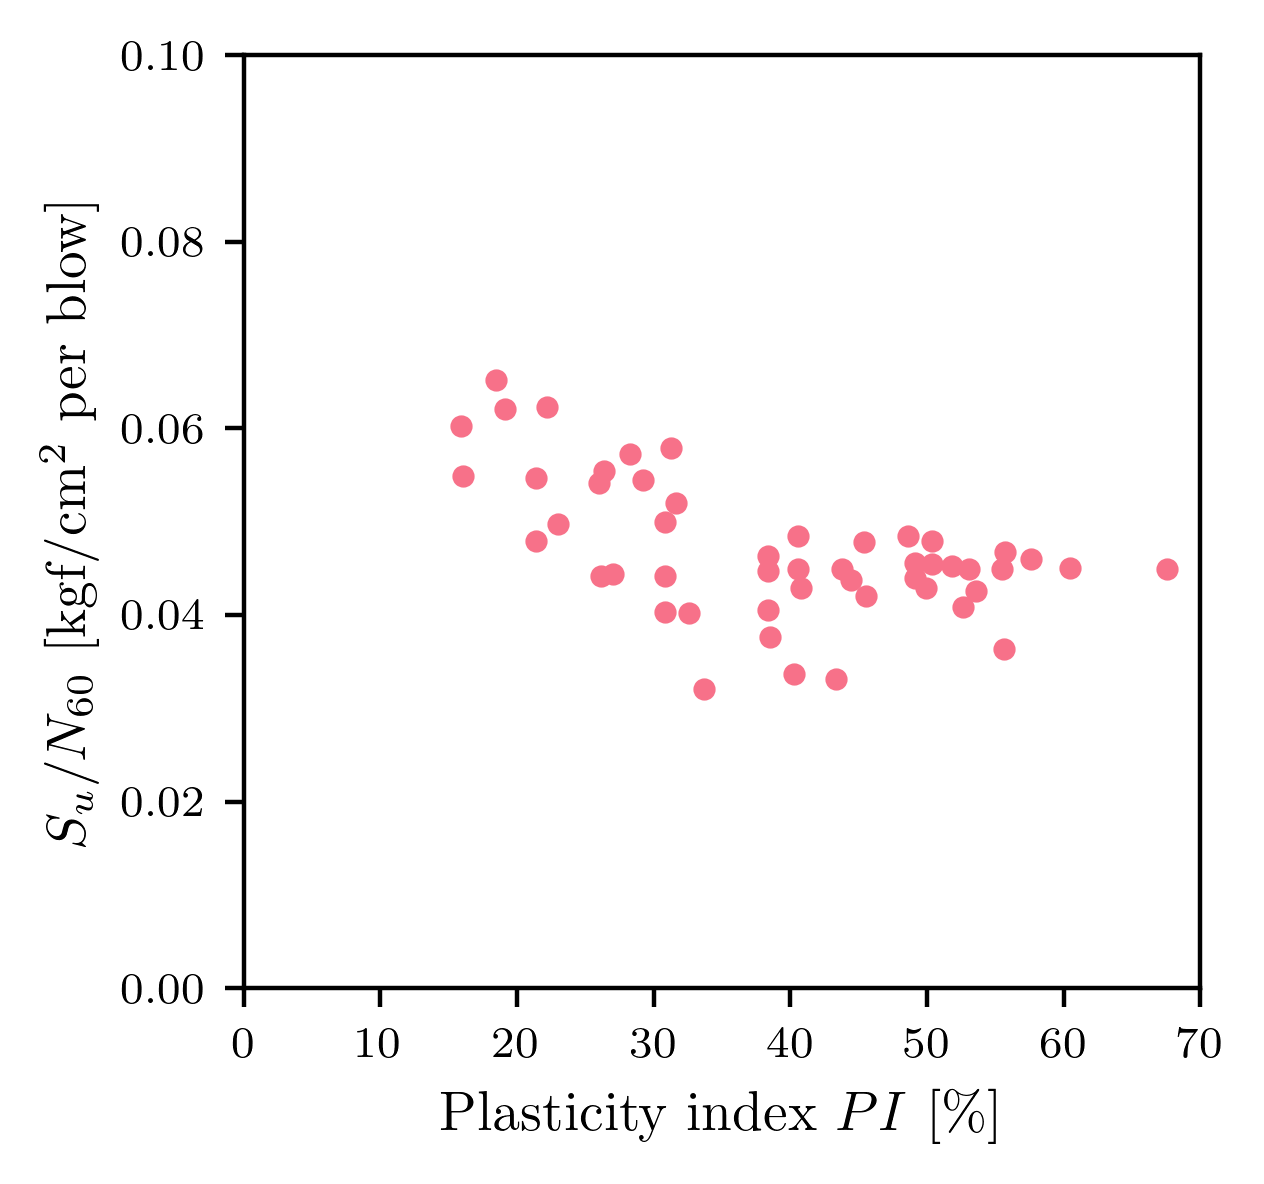

In [40]:
gf.PlotAll(DATA, IDs, 'N', 'USR', mode='.', legendMode=False, xlabel=r'Plasticity index $PI$ [\%]', ylabel=r'$S_u/N_{60}$ [kgf/cm$^2$ per blow]', xsize=3.2, ysize=3, hold=1)

# Make y scale from 0 to 0.1
plt.ylim(0,0.1)

#Make x scale from 0 to 70
plt.xlim(0,70)
# Define the model function
def func(x, a, b,c):
    return -a * np.log(b * x)+c

# Example data (replace with your actual data)
xdata = np.array(DATA[0]['N'])
ydata = np.array(DATA[0]['USR'])

from scipy.optimize import curve_fit

# Provide an initial guess for the parameters
initial_guess = [0.1, 0.1, 0.1]  # Adjust these values based on your data

# Fit the model to the data
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess)

# Print the optimized parameters
print("Optimized parameters:", popt)

# Plot the fitted curve
x_fit = np.linspace(min(xdata), max(xdata), 100)
y_fit = func(x_fit, *popt)

#plt.plot(x_fit, y_fit, label='Fitted curve', color='red')
plt.tight_layout()
plt.savefig('SPT_FIG.svg')

plt.show()

